In [13]:
from scipy.misc import imread
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
     

%matplotlib inline

In [16]:
base_dir = "data/training-set/GTSRB/Final_Training/Images/"
            
def partial_data():
    for cls_string in os.listdir(base_dir):
        csv_path = base_dir + "/{0}/GT-{0}.csv".format(cls_string)
        
        df = pd.read_csv(csv_path, sep=";")
        df['Filename'] = base_dir + cls_string + "/" + df['Filename']
        
        yield df

print("Cargando datos, esto puede tardar unos minutos...")
data = pd.concat(partial_data())
data["Image"] = data.Filename.apply(imread)

Cargando datos, esto puede tomar unos minutos


In [17]:
data.sample(n=5)

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Image
985,data/training-set/GTSRB/Final_Training/Images/...,50,51,6,5,45,45,8,"[[[23, 25, 22], [29, 29, 27], [31, 31, 29], [2..."
696,data/training-set/GTSRB/Final_Training/Images/...,31,35,6,5,25,30,13,"[[[255, 255, 253], [255, 255, 255], [255, 255,..."
34,data/training-set/GTSRB/Final_Training/Images/...,30,31,5,6,25,25,34,"[[[240, 173, 103], [244, 180, 108], [248, 188,..."
592,data/training-set/GTSRB/Final_Training/Images/...,76,70,7,7,70,64,13,"[[[254, 255, 255], [255, 255, 255], [255, 255,..."
55,data/training-set/GTSRB/Final_Training/Images/...,104,93,10,8,95,85,29,"[[[65, 63, 64], [66, 64, 65], [68, 66, 69], [6..."


class: 1, shape: (32, 32, 3)


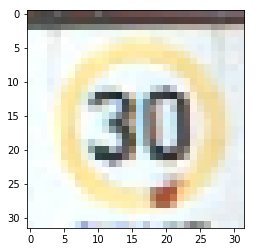

class: 13, shape: (32, 32, 3)


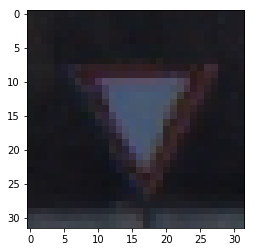

class: 4, shape: (32, 32, 3)


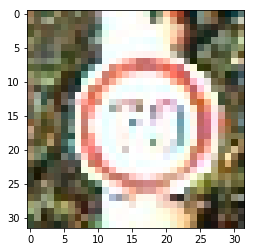

class: 10, shape: (32, 32, 3)


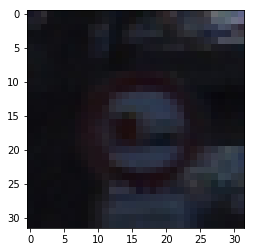

class: 3, shape: (32, 32, 3)


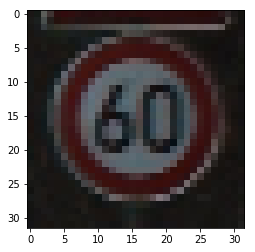

class: 28, shape: (32, 32, 3)


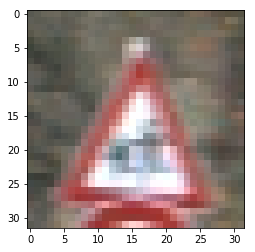

class: 2, shape: (32, 32, 3)


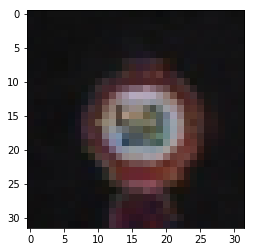

class: 8, shape: (32, 32, 3)


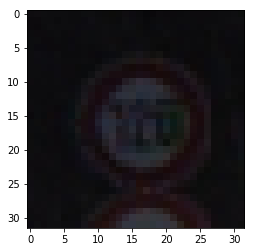

class: 18, shape: (32, 32, 3)


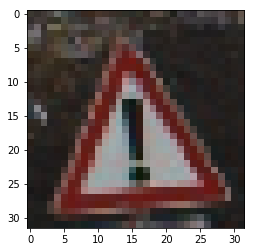

class: 25, shape: (32, 32, 3)


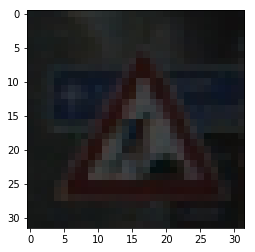

In [18]:
batch = data.sample(10)

for i, row in batch.iterrows():
    img = row.Image
    print("class: {}, shape: {}".format(row.ClassId, img.shape))
    plt.imshow(img)
    plt.show()

In [54]:
features = np.stack(data.Image.as_matrix())
labels = np.stack(data.ClassId.as_matrix())

print("Features shape: {} \nLabels shape: {}".format(features.shape, labels.shape))

Features shape: (39209, 32, 32, 3) 
Labels shape: (39209,)
